## Understanding Data

In [26]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [27]:
df = pd.read_csv("data/user_influencer_pairs.csv")

In [28]:
df.head()

,followId,FollowerId,InfluencerId
0,11,87E2923A-FD01-43AC-8369-864081916F83,8E665D3B-F5CD-48D2-8103-4B74B79A405F
1,20,371088ec-ccd9-4c1e-acb3-6c3b43c84627,f7e6dd70-1b33-4d36-916b-c31e655555b5
2,21,24f13669-d3c4-431b-ae72-7c445aec412c,f7e6dd70-1b33-4d36-916b-c31e655555b5
3,22,a328005f-1ca5-4c79-961f-4eab118a32ab,b0871e46-0322-4934-9b04-49dcf3ce3130
4,23,a328005f-1ca5-4c79-961f-4eab118a32ab,bce93b7e-f594-4117-a354-1051f10fd56c


In [29]:
df.tail()

,followId,FollowerId,InfluencerId
5375,7634,efd69786-6e4f-46cb-b392-506af27255c6,f2e90b63-f306-4114-b7be-82c97965b6b4
5376,7635,86e83246-c5d0-4925-8695-aa77d7711683,7e272214-eeea-4eff-b958-043b29c25dc4
5377,7639,3cf1bf7e-484f-46ca-b1e0-be5ae35270b7,3cf1bf7e-484f-46ca-b1e0-be5ae35270b7
5378,7640,1020fcf7-572d-4d06-951e-7a4256af980b,1020fcf7-572d-4d06-951e-7a4256af980b
5379,7642,be209f6a-0e33-46cf-9770-cdf964bf38ee,82725363-150a-4981-a0dd-62dbc5bb337a


In [30]:
df.shape

(5380, 3)

In [31]:
cols = df.select_dtypes('object').columns
df[cols] = df[cols].stack().astype('category').cat.codes.unstack()

In [32]:
df = df.drop(columns=["followId"])
df

,FollowerId,InfluencerId
0,2324,2369
1,966,4250
2,648,4250
3,2817,3040
4,2817,3261
...,...,...
5375,4099,4153
5376,2305,2169
5377,1066,1066
5378,297,297


flw = df["FollowerId"].unique().tolist()
infl = df["InfluencerId"].unique().tolist()

#turn ordinal data into categorical data
ordinal_var_dict = {"FollowerId": flw, "InfluencerId": infl}
ordinal_cols = list(ordinal_var_dict.keys())

ordinal_data = df[ordinal_cols]
for col_ordinal, values in ordinal_var_dict.items():
    ordinal_data[col_ordinal] = (ordinal_data[col_ordinal].astype("category").cat.set_categories(values).cat.codes)

ordinal_data

C:\Users\kwong\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


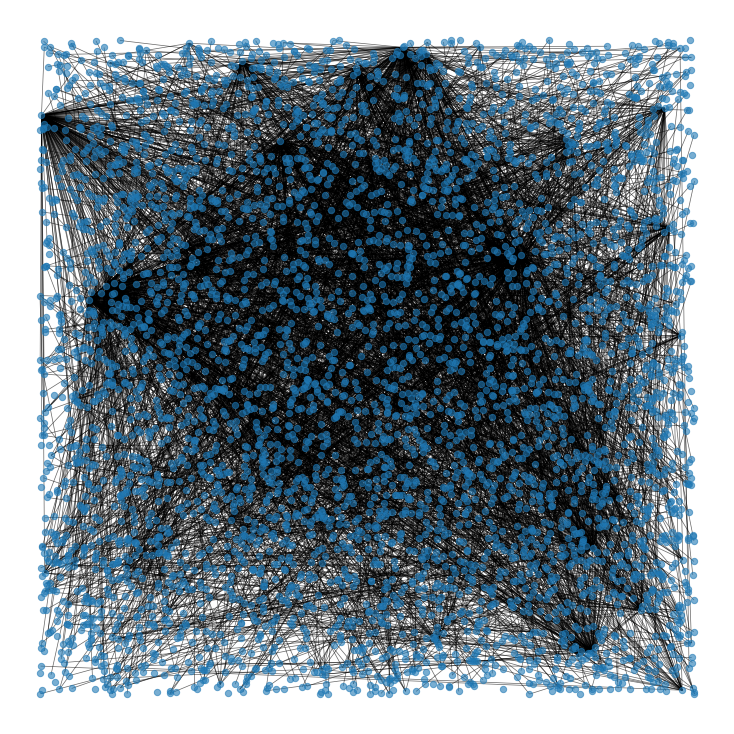

In [15]:
# create graph
G = nx.from_pandas_edgelist(df, "FollowerId", "InfluencerId", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

## Data Processing for Model Building

#### 1. Retrieve Unconnected Node Pairs – Negative Samples

In [16]:
node_list_1 = df["FollowerId"].tolist()
node_list_2 = df["InfluencerId"].tolist()

In [17]:
# combine all nodes in a list
node_list = node_list_1 + node_list_2

In [18]:
# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

In [131]:
node_list

[2324,
 966,
 648,
 2817,
 3502,
 1249,
 4112,
 2891,
 2492,
 147,
 3112,
 3317,
 4101,
 1074,
 4297,
 410,
 686,
 3531,
 1981,
 1985,
 1552,
 1872,
 3909,
 2933,
 3867,
 493,
 899,
 727,
 2779,
 2757,
 3390,
 264,
 1276,
 243,
 1987,
 3956,
 1538,
 1802,
 3412,
 1131,
 2741,
 3930,
 643,
 1349,
 2150,
 20,
 1027,
 2869,
 4384,
 241,
 3883,
 2252,
 3602,
 3191,
 342,
 3201,
 2631,
 244,
 3857,
 4133,
 471,
 1083,
 3262,
 3368,
 2346,
 270,
 155,
 1256,
 4057,
 2633,
 1942,
 417,
 1576,
 822,
 1171,
 143,
 2361,
 146,
 956,
 1826,
 511,
 783,
 174,
 721,
 3282,
 3640,
 3670,
 3686,
 328,
 1487,
 2550,
 3062,
 1823,
 115,
 1180,
 3337,
 2522,
 1713,
 1760,
 1003,
 928,
 683,
 2105,
 1189,
 3350,
 2322,
 3156,
 3352,
 2975,
 612,
 3134,
 629,
 3996,
 480,
 3801,
 1430,
 2612,
 559,
 1785,
 1456,
 348,
 3227,
 2171,
 2323,
 3428,
 314,
 3914,
 1934,
 2685,
 4059,
 3369,
 2600,
 1071,
 608,
 1179,
 4018,
 1191,
 3287,
 1475,
 2263,
 1332,
 2805,
 3794,
 3001,
 1374,
 4128,
 1804,
 1745,
 21

In [19]:
# build adjacency matrix
adj_G = nx.to_numpy_matrix(G, nodelist = node_list)

In [20]:
adj_G.shape

(4400, 4400)

In [21]:
adj_G

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
# get the unconnected pairs by searching the diagonal for zeros

# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
    for j in range(offset,adj_G.shape[1]):
        if i != j:
            if nx.shortest_path_length(G, str(i), str(j)) <= 2:
                if adj_G[i,j] == 0:
                    all_unconnected_pairs.append([node_list[i],node_list[j]])
                    
    offset = offset + 1 

  0%|          | 0/4400 [00:00<?, ?it/s]


NodeNotFound: Either source 0 or target 1 is not in G

In [22]:
len(all_unconnected_pairs)

0

In [23]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

In [25]:
data

,node_1,node_2,link


#### 2. Remove the Positive Samples--connected node pairs

In [136]:
initial_node_count = len(G.nodes)

df_temp = df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(df.index.values):
    # remove a node pair and build a new graph
    G_temp = nx.from_pandas_edgelist(df_temp.drop(index = i), "FollowerId", "InfluencerId", create_using=nx.Graph())
    # check there is no spliting of graph and number of nodes is same
    if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
        omissible_links_index.append(i)
        df_temp = df_temp.drop(index = i)

100%|██████████| 5380/5380 [03:31<00:00, 25.45it/s]


In [137]:
len(omissible_links_index)

0

#### 3. Data for model training

In [138]:
# create dataframe of removable edges
df_ghost = df.loc[omissible_links_index]

# add the target variable 'link'
df_ghost['link'] = 1

data = data.append(df_ghost[['FollowerId', 'InfluencerId', 'link']], ignore_index=True)

In [139]:
data['link'].value_counts()

Series([], Name: link, dtype: int64)

#### 4. Feature Extraction

In [40]:
# drop removable edges
df_partial = df.drop(index=df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(df_partial, "FollowerId", "InfluencerId", create_using=nx.Graph())

In [43]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 50/50 [02:21<00:00,  2.83s/it]


In [44]:
x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(data['FollowerId'], data['InfluencerId'])]

In [46]:
x

[]

### Build the Link Prediction Model

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), data['link'], 
                                                test_size = 0.3, 
                                                random_state = 35)

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [48]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

NameError: name 'xtrain' is not defined

In [ ]:
predictions = lr.predict_proba(xtest)

In [ ]:
roc_auc_score(ytest, predictions[:,1])

In [ ]:
import lightgbm as lgbm

train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)